In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Data Loading Setup Complete")

Data Loading Setup Complete


In [3]:
# Load the three datasets
data_path = Path('../data/derived/geo_data')

# Load bathrooms data
df_bathrooms = pd.read_csv(data_path / 'f_bathrooms.csv')
print(f"Bathrooms data shape: {df_bathrooms.shape}")
print(f"Bathrooms columns: {list(df_bathrooms.columns)}")

# Load land data
df_land = pd.read_csv(data_path / 'f_land.csv')
print(f"\nLand data shape: {df_land.shape}")
print(f"Land columns: {list(df_land.columns)}")

# Load median income data
df_income = pd.read_csv(data_path / 'f_median_income.csv')
print(f"\nMedian income data shape: {df_income.shape}")
print(f"Median income columns: {list(df_income.columns)}")

Bathrooms data shape: (1600, 7)
Bathrooms columns: ['tract_geoid', 'bathroom_overall_condition', 'bathroom_litter', 'bathroom_graffiti', 'bathroom_amenities', 'bathroom_structural', 'bathroom_count']

Land data shape: (2327, 3)
Land columns: ['tract_geoid', 'pop20', 'land_area_sqmi']

Median income data shape: (5182, 2)
Median income columns: ['tract_fips', 'median_income']


In [4]:
# Merge the datasets
# Note: bathrooms and land use 'tract_geoid', income uses 'tract_fips'
# These should be the same identifier

# First merge bathrooms and land
df_merged = df_bathrooms.merge(
    df_land,
    on='tract_geoid',
    how='inner'
)

# Merge with income (need to handle different column name)
df_merged = df_merged.merge(
    df_income.rename(columns={'tract_fips': 'tract_geoid'}),
    on='tract_geoid',
    how='inner'
)

print(f"Merged data shape: {df_merged.shape}")
print(f"\nMerged columns: {list(df_merged.columns)}")
print(f"\nFirst few rows:")
df_merged.head()

Merged data shape: (1498, 10)

Merged columns: ['tract_geoid', 'bathroom_overall_condition', 'bathroom_litter', 'bathroom_graffiti', 'bathroom_amenities', 'bathroom_structural', 'bathroom_count', 'pop20', 'land_area_sqmi', 'median_income']

First few rows:


,tract_geoid,bathroom_overall_condition,bathroom_litter,bathroom_graffiti,bathroom_amenities,bathroom_structural,bathroom_count,pop20,land_area_sqmi,median_income
0,36005000200,NaN,NaN,NaN,NaN,NaN,0.0,4779,0.174839,121171.0
1,36005000400,NaN,NaN,NaN,NaN,NaN,0.0,6272,0.297565,98242.0
2,36005001600,NaN,NaN,NaN,NaN,NaN,0.0,5795,0.187290,42957.0
3,36005001901,NaN,NaN,NaN,NaN,NaN,0.0,2292,0.079154,67361.0
4,36005001902,NaN,NaN,NaN,NaN,NaN,0.0,1613,0.181368,76429.0


In [5]:
# Summary statistics
print("Summary Statistics:")
print("=" * 80)
df_merged.describe()

Summary Statistics:


,tract_geoid,bathroom_overall_condition,bathroom_litter,bathroom_graffiti,bathroom_amenities,bathroom_structural,bathroom_count,pop20,land_area_sqmi,median_income
count,1.498000e+03,416.000000,477.000000,482.000000,415.000000,433.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,3.605451e+10,0.194311,0.026555,0.004149,0.103079,0.157506,0.492657,4190.698932,0.127306,87346.251669
std,2.652913e+07,0.581713,0.225049,0.091098,0.421857,0.525503,0.952590,1977.953334,0.180537,43147.524470
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.000000,0.015961,12170.000000
25%,3.604702e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2703.000000,0.061500,58066.500000
50%,3.606100e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3877.000000,0.074804,80954.500000
75%,3.608104e+10,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5366.250000,0.127472,107409.250000
max,3.608503e+10,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,17222.000000,3.568306,250000.000000


In [28]:
# Select numeric columns for correlation analysis
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()
# Remove the geoid column if it's numeric
numeric_cols = [col for col in numeric_cols if 'geoid' not in col.lower()]

columns_for_correlation = ["bathroom_overall_condition","bathroom_count","pop20","median_income","bathrooms_per_1000pop"]
print(f"Numeric columns for correlation: {numeric_cols}")

# Calculate correlation matrix
correlation_matrix = df_merged[columns_for_correlation].corr()

print("\nCorrelation Matrix:")
correlation_matrix

Numeric columns for correlation: ['bathroom_overall_condition', 'bathroom_litter', 'bathroom_graffiti', 'bathroom_amenities', 'bathroom_structural', 'bathroom_count', 'pop20', 'land_area_sqmi', 'median_income', 'bathrooms_per_1000pop']

Correlation Matrix:


,bathroom_overall_condition,bathroom_count,pop20,median_income,bathrooms_per_1000pop
bathroom_overall_condition,1.000000,-0.048697,0.034642,-0.071167,-0.017804
bathroom_count,-0.048697,1.000000,0.090433,-0.029377,0.462598
pop20,0.034642,0.090433,1.000000,-0.037801,-0.071924
median_income,-0.071167,-0.029377,-0.037801,1.000000,0.010278
bathrooms_per_1000pop,-0.017804,0.462598,-0.071924,0.010278,1.000000


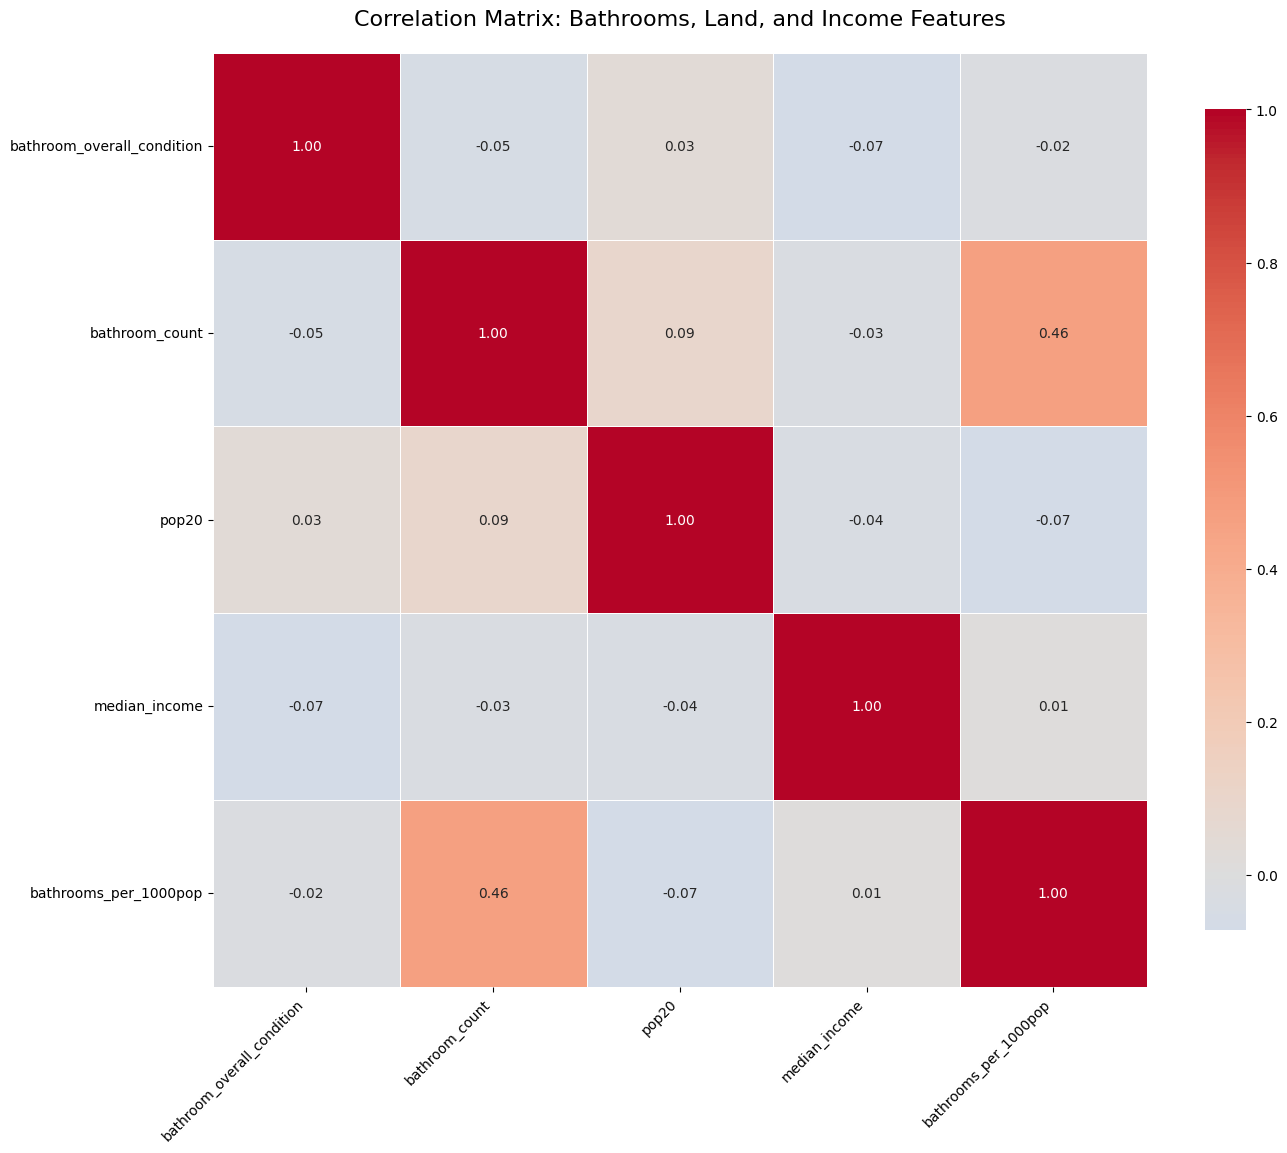

In [29]:
# Create a correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix: Bathrooms, Land, and Income Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Find top correlations (excluding diagonal)
# Get upper triangle of correlation matrix
import numpy as np

upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Convert to long format and sort
correlations_list = []
for col in upper_tri.columns:
    for idx in upper_tri.index:
        if pd.notna(upper_tri.loc[idx, col]):
            correlations_list.append({
                'Feature 1': idx,
                'Feature 2': col,
                'Correlation': upper_tri.loc[idx, col]
            })

df_correlations = pd.DataFrame(correlations_list)
df_correlations['Abs_Correlation'] = df_correlations['Correlation'].abs()
df_correlations = df_correlations.sort_values('Abs_Correlation', ascending=False)

print("Top 20 Strongest Correlations:")
print("=" * 80)
df_correlations.head(20)[['Feature 1', 'Feature 2', 'Correlation']]

Top 20 Strongest Correlations:


,Feature 1,Feature 2,Correlation
0,bathroom_overall_condition,bathroom_litter,0.279887
3,bathroom_overall_condition,bathroom_amenities,0.274848
6,bathroom_overall_condition,bathroom_structural,0.262249
26,bathroom_count,land_area_sqmi,0.249317
4,bathroom_litter,bathroom_amenities,0.205167
9,bathroom_amenities,bathroom_structural,0.169426
8,bathroom_graffiti,bathroom_structural,0.168823
35,land_area_sqmi,median_income,0.127350
31,bathroom_amenities,median_income,-0.115698
32,bathroom_structural,median_income,-0.108804


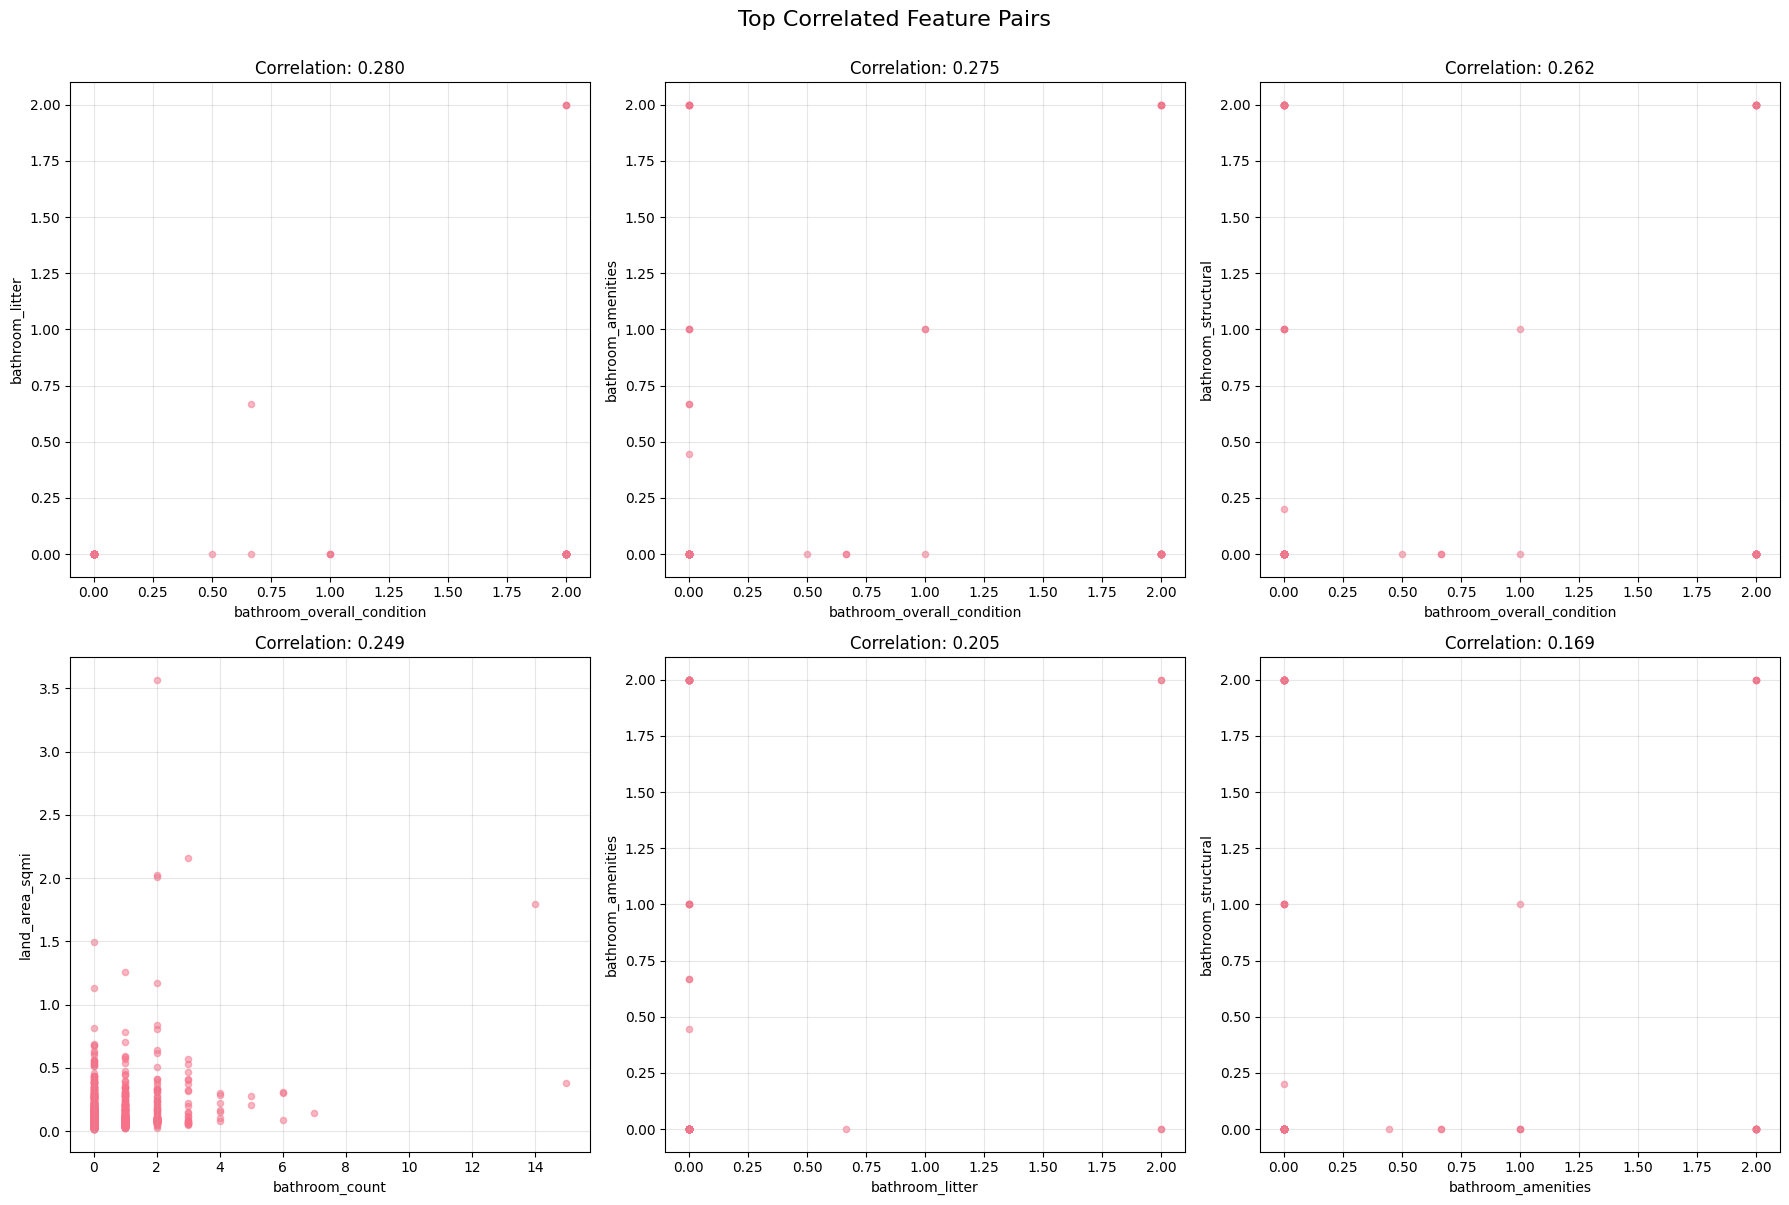

In [9]:
# Create scatter plots for top correlations
top_pairs = df_correlations.head(6)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (_, row) in enumerate(top_pairs.iterrows()):
    if idx >= 6:
        break
    
    feat1 = row['Feature 1']
    feat2 = row['Feature 2']
    corr = row['Correlation']
    
    # Remove NaN values for plotting
    plot_data = df_merged[[feat1, feat2]].dropna()
    
    axes[idx].scatter(plot_data[feat1], plot_data[feat2], alpha=0.5, s=20)
    axes[idx].set_xlabel(feat1, fontsize=10)
    axes[idx].set_ylabel(feat2, fontsize=10)
    axes[idx].set_title(f'Correlation: {corr:.3f}', fontsize=12)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Top Correlated Feature Pairs', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

Correlations with Median Income:
median_income                 1.000000
land_area_sqmi                0.127350
bathroom_litter              -0.009301
bathroom_graffiti            -0.016674
bathroom_count               -0.029377
pop20                        -0.037801
bathroom_overall_condition   -0.071167
bathroom_structural          -0.108804
bathroom_amenities           -0.115698
Name: median_income, dtype: float64


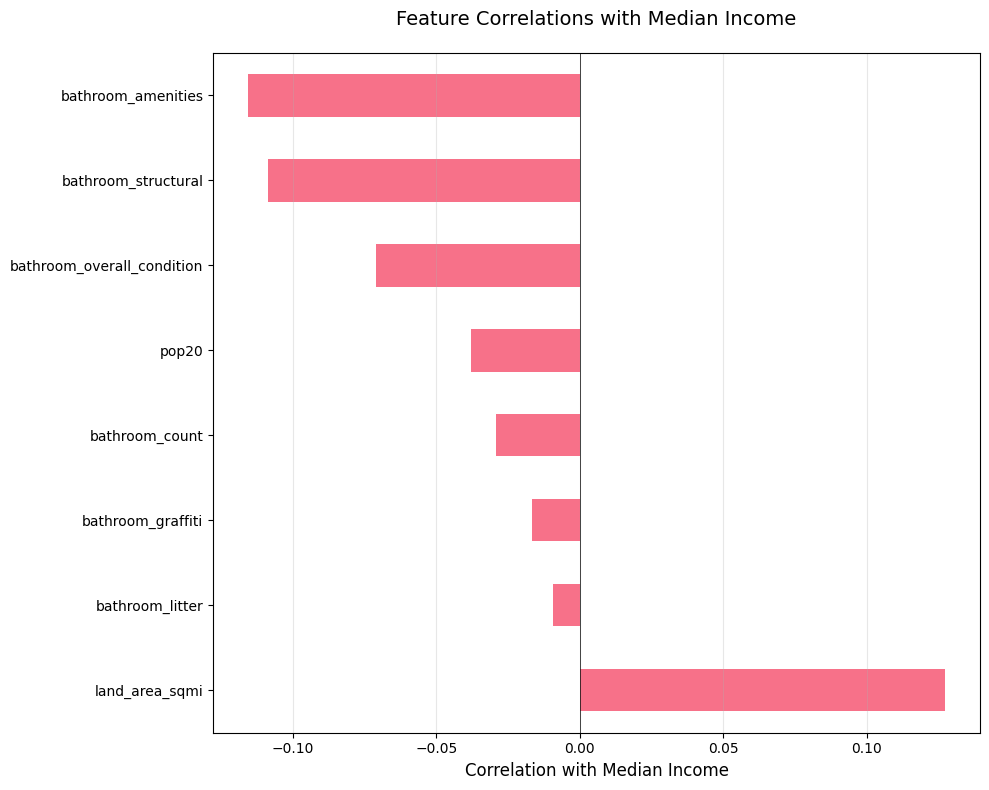

In [10]:
# Analyze correlations with median income specifically
income_correlations = correlation_matrix['median_income'].sort_values(ascending=False)

print("Correlations with Median Income:")
print("=" * 80)
print(income_correlations)

# Visualize
plt.figure(figsize=(10, 8))
income_correlations[income_correlations.index != 'median_income'].plot(kind='barh')
plt.xlabel('Correlation with Median Income', fontsize=12)
plt.title('Feature Correlations with Median Income', fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [26]:
df_merged["bathrooms_per_1000pop"] = df_merged.bathroom_count * 1000 / df_merged.pop20
print(df_merged.columns)
df_merged[["tract_geoid","bathroom_count","pop20","bathrooms_per_1000pop"]].to_csv("../data/derived/geo_data/f_bathrooms_per_pop.csv")

Index(['tract_geoid', 'bathroom_overall_condition', 'bathroom_litter',
       'bathroom_graffiti', 'bathroom_amenities', 'bathroom_structural',
       'bathroom_count', 'pop20', 'land_area_sqmi', 'median_income',
       'bathrooms_per_1000pop'],
      dtype='object')
